### Stock Market Prediction And Forecasting Using Stacked LSTM

In [1]:
### Keras and Tensorflow >2.0

In [2]:
### Data Collection
import pandas_datareader as pdr
key="a85a21b0bf9a3480cdcd04b070d97d30e53ae4dd"

In [3]:
df = pdr.get_data_tiingo('AAPL', api_key=key)

c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\pandas_datareader\tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  return pd.concat(dfs, self._concat_axis)


In [4]:
df.to_csv('AAPL.csv')

In [5]:
import pandas as pd

In [6]:
df=pd.read_csv('AAPL.csv')

In [7]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2017-05-08 00:00:00+00:00,153.01,153.70,149.03,149.03,48339210,36.110945,36.273788,35.171650,35.171650,193356840,0.00,1.0
1,AAPL,2017-05-09 00:00:00+00:00,153.99,154.88,153.45,153.87,35942435,36.342229,36.552273,36.214787,36.313909,143769740,0.00,1.0
2,AAPL,2017-05-10 00:00:00+00:00,153.26,153.94,152.11,153.63,25670456,36.169946,36.330429,35.898542,36.257268,102681824,0.00,1.0
3,AAPL,2017-05-11 00:00:00+00:00,153.95,154.07,152.31,152.45,25596687,36.481471,36.509908,36.092841,36.126017,102386748,0.63,1.0
4,AAPL,2017-05-12 00:00:00+00:00,156.10,156.42,154.67,154.70,32221756,36.990956,37.066786,36.652090,36.659199,128887024,0.00,1.0


In [8]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1254,AAPL,2022-04-29 00:00:00+00:00,157.65,166.20,157.25,161.84,131747571,157.65,166.20,157.25,161.84,131747571,0.0,1.0
1255,AAPL,2022-05-02 00:00:00+00:00,157.96,158.23,153.27,156.71,123055265,157.96,158.23,153.27,156.71,123055265,0.0,1.0
1256,AAPL,2022-05-03 00:00:00+00:00,159.48,160.71,156.32,158.15,88966526,159.48,160.71,156.32,158.15,88966526,0.0,1.0
1257,AAPL,2022-05-04 00:00:00+00:00,166.02,166.48,159.26,159.67,107521649,166.02,166.48,159.26,159.67,107521649,0.0,1.0
1258,AAPL,2022-05-05 00:00:00+00:00,156.77,164.08,154.95,163.85,130525275,156.77,164.08,154.95,163.85,130525275,0.0,1.0


In [9]:
df1=df.reset_index()['close']

In [10]:
df1

0       153.01
1       153.99
2       153.26
3       153.95
4       156.10
         ...  
1254    157.65
1255    157.96
1256    159.48
1257    166.02
1258    156.77
Name: close, Length: 1259, dtype: float64

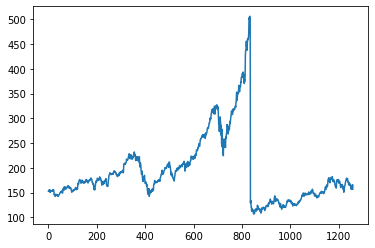

In [11]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [12]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [13]:
import numpy as np

In [14]:
df1

0       153.01
1       153.99
2       153.26
3       153.95
4       156.10
         ...  
1254    157.65
1255    157.96
1256    159.48
1257    166.02
1258    156.77
Name: close, Length: 1259, dtype: float64

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [16]:
print(df1)

[[0.11564183]
 [0.11809643]
 [0.116268  ]
 ...
 [0.13184721]
 [0.14822793]
 [0.12505949]]


In [17]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [18]:
training_size,test_size

(818, 441)

In [19]:
train_data

array([[0.11564183],
       [0.11809643],
       [0.116268  ],
       [0.11799624],
       [0.12338134],
       [0.12237946],
       [0.12180338],
       [0.10872887],
       [0.11446462],
       [0.11576706],
       [0.11809643],
       [0.11762054],
       [0.11646838],
       [0.11779587],
       [0.11714465],
       [0.11729493],
       [0.11501565],
       [0.11606763],
       [0.12175329],
       [0.11794615],
       [0.11924859],
       [0.12155291],
       [0.12060113],
       [0.1055479 ],
       [0.09663118],
       [0.09956168],
       [0.09597996],
       [0.09380088],
       [0.08874139],
       [0.0989355 ],
       [0.09560426],
       [0.0977583 ],
       [0.09715717],
       [0.09878522],
       [0.09763306],
       [0.09239825],
       [0.09765811],
       [0.09227301],
       [0.09312461],
       [0.09182217],
       [0.09329994],
       [0.08989355],
       [0.09352536],
       [0.09572949],
       [0.0969067 ],
       [0.09743269],
       [0.10251722],
       [0.105

In [20]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [21]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [22]:
print(X_train.shape), print(y_train.shape)

(717, 100)
(717,)


(None, None)

In [23]:
print(X_test.shape), print(ytest.shape)

(340, 100)
(340,)


(None, None)

In [24]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [25]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [26]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [29]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=50,batch_size=55,verbose=1)

Epoch 1/50
14/14 [==============================] - 8s 245ms/step - loss: 0.0326 - val_loss: 0.0016
Epoch 2/50
14/14 [==============================] - 2s 166ms/step - loss: 0.0083 - val_loss: 0.0048
Epoch 3/50
14/14 [==============================] - 2s 157ms/step - loss: 0.0022 - val_loss: 6.9867e-04
Epoch 4/50
14/14 [==============================] - 2s 155ms/step - loss: 0.0016 - val_loss: 3.1816e-04
Epoch 5/50
14/14 [==============================] - 2s 153ms/step - loss: 0.0014 - val_loss: 4.6875e-04
Epoch 6/50
14/14 [==============================] - 2s 153ms/step - loss: 0.0012 - val_loss: 3.6821e-04
Epoch 7/50
14/14 [==============================] - 2s 153ms/step - loss: 0.0011 - val_loss: 3.3599e-04
Epoch 8/50
14/14 [==============================] - 2s 153ms/step - loss: 0.0011 - val_loss: 2.7771e-04
Epoch 9/50
14/14 [==============================] - 2s 151ms/step - loss: 0.0011 - val_loss: 2.7644e-04
Epoch 10/50
14/14 [==============================] - 2s 155ms/step - los

In [30]:
import tensorflow as tf

In [31]:
tf.__version__

'2.7.0'

In [32]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [33]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [34]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

224.97399246849585

In [35]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

149.8469787206252

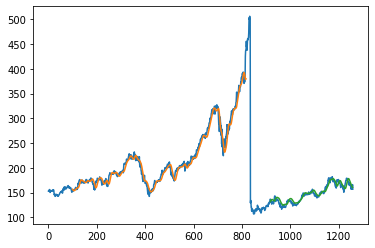

In [36]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [37]:
len(test_data)

441

In [38]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape


(1, 100)

In [39]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [40]:
temp_input

[0.17257357545397617,
 0.16904195366311836,
 0.1814902943018159,
 0.1638572323105823,
 0.16105197244834057,
 0.1575704445835942,
 0.1656856606136506,
 0.1723231058234188,
 0.17392611145898557,
 0.18407013149655604,
 0.18146524733876013,
 0.1816906700062617,
 0.1787351283656856,
 0.17715716969317463,
 0.18827802128991855,
 0.182492172824045,
 0.1705197244834063,
 0.16320601127113332,
 0.16363180964308072,
 0.1636819035691922,
 0.17092047589229803,
 0.17204758922980584,
 0.1636819035691922,
 0.1658860363180964,
 0.15769567939887286,
 0.1487539135879774,
 0.1444458359423919,
 0.13918597370068875,
 0.13720726361928615,
 0.1325986224170319,
 0.13237319974953032,
 0.13119599248591102,
 0.15902316844082653,
 0.17016906700062612,
 0.16974326862867878,
 0.17282404508453347,
 0.165460237946149,
 0.16418284283030676,
 0.16235441452723853,
 0.17029430181590482,
 0.17392611145898557,
 0.16350657482780212,
 0.1547902316844082,
 0.15539135879774574,
 0.16518472135253592,
 0.1645835942391985,
 0.15539

In [41]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.13179083]
101
1 day input [0.16904195 0.18149029 0.16385723 0.16105197 0.15757044 0.16568566
 0.17232311 0.17392611 0.18407013 0.18146525 0.18169067 0.17873513
 0.17715717 0.18827802 0.18249217 0.17051972 0.16320601 0.16363181
 0.1636819  0.17092048 0.17204759 0.1636819  0.16588604 0.15769568
 0.14875391 0.14444584 0.13918597 0.13720726 0.13259862 0.1323732
 0.13119599 0.15902317 0.17016907 0.16974327 0.17282405 0.16546024
 0.16418284 0.16235441 0.1702943  0.17392611 0.16350657 0.15479023
 0.15539136 0.16518472 0.16458359 0.15539136 0.15143394 0.14396994
 0.13332498 0.14001252 0.14529743 0.1459737  0.14116468 0.14958046
 0.14875391 0.14108954 0.13139637 0.12673763 0.14053851 0.12944271
 0.11994991 0.1096556  0.1208516  0.13212273 0.13470257 0.14311835
 0.14662492 0.15524108 0.1587226  0.16839073 0.17001879 0.17222292
 0.1806387  0.17765811 0.16974327 0.16899186 0.17933626 0.17087038
 0.16278021 0.16355667 0.15842204 0.14755166 0.15233563 0.1591985
 0.1463995  0.14584847 0.15168441 0

11 day output [[0.13352042]]
12 day input [0.17873513 0.17715717 0.18827802 0.18249217 0.17051972 0.16320601
 0.16363181 0.1636819  0.17092048 0.17204759 0.1636819  0.16588604
 0.15769568 0.14875391 0.14444584 0.13918597 0.13720726 0.13259862
 0.1323732  0.13119599 0.15902317 0.17016907 0.16974327 0.17282405
 0.16546024 0.16418284 0.16235441 0.1702943  0.17392611 0.16350657
 0.15479023 0.15539136 0.16518472 0.16458359 0.15539136 0.15143394
 0.14396994 0.13332498 0.14001252 0.14529743 0.1459737  0.14116468
 0.14958046 0.14875391 0.14108954 0.13139637 0.12673763 0.14053851
 0.12944271 0.11994991 0.1096556  0.1208516  0.13212273 0.13470257
 0.14311835 0.14662492 0.15524108 0.1587226  0.16839073 0.17001879
 0.17222292 0.1806387  0.17765811 0.16974327 0.16899186 0.17933626
 0.17087038 0.16278021 0.16355667 0.15842204 0.14755166 0.15233563
 0.1591985  0.1463995  0.14584847 0.15168441 0.15125861 0.14922981
 0.13763306 0.14036318 0.12513463 0.12455855 0.14226675 0.12726362
 0.12804008 0.131847

19 day output [[0.13712944]]
20 day input [0.17092048 0.17204759 0.1636819  0.16588604 0.15769568 0.14875391
 0.14444584 0.13918597 0.13720726 0.13259862 0.1323732  0.13119599
 0.15902317 0.17016907 0.16974327 0.17282405 0.16546024 0.16418284
 0.16235441 0.1702943  0.17392611 0.16350657 0.15479023 0.15539136
 0.16518472 0.16458359 0.15539136 0.15143394 0.14396994 0.13332498
 0.14001252 0.14529743 0.1459737  0.14116468 0.14958046 0.14875391
 0.14108954 0.13139637 0.12673763 0.14053851 0.12944271 0.11994991
 0.1096556  0.1208516  0.13212273 0.13470257 0.14311835 0.14662492
 0.15524108 0.1587226  0.16839073 0.17001879 0.17222292 0.1806387
 0.17765811 0.16974327 0.16899186 0.17933626 0.17087038 0.16278021
 0.16355667 0.15842204 0.14755166 0.15233563 0.1591985  0.1463995
 0.14584847 0.15168441 0.15125861 0.14922981 0.13763306 0.14036318
 0.12513463 0.12455855 0.14226675 0.12726362 0.12804008 0.13184721
 0.14822793 0.12505949 0.13179083 0.1312886  0.13105351 0.13101792
 0.13112596 0.13133483

27 day output [[0.14050967]]
28 day input [0.13720726 0.13259862 0.1323732  0.13119599 0.15902317 0.17016907
 0.16974327 0.17282405 0.16546024 0.16418284 0.16235441 0.1702943
 0.17392611 0.16350657 0.15479023 0.15539136 0.16518472 0.16458359
 0.15539136 0.15143394 0.14396994 0.13332498 0.14001252 0.14529743
 0.1459737  0.14116468 0.14958046 0.14875391 0.14108954 0.13139637
 0.12673763 0.14053851 0.12944271 0.11994991 0.1096556  0.1208516
 0.13212273 0.13470257 0.14311835 0.14662492 0.15524108 0.1587226
 0.16839073 0.17001879 0.17222292 0.1806387  0.17765811 0.16974327
 0.16899186 0.17933626 0.17087038 0.16278021 0.16355667 0.15842204
 0.14755166 0.15233563 0.1591985  0.1463995  0.14584847 0.15168441
 0.15125861 0.14922981 0.13763306 0.14036318 0.12513463 0.12455855
 0.14226675 0.12726362 0.12804008 0.13184721 0.14822793 0.12505949
 0.13179083 0.1312886  0.13105351 0.13101792 0.13112596 0.13133483
 0.13161366 0.1319412  0.13230339 0.13269106 0.13309811 0.13352042
 0.13395478 0.13439852 

In [42]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [43]:
import matplotlib.pyplot as plt

In [44]:
len(df1)

1259

ValueError: x and y must have same first dimension, but have shapes (100,) and (101, 1)

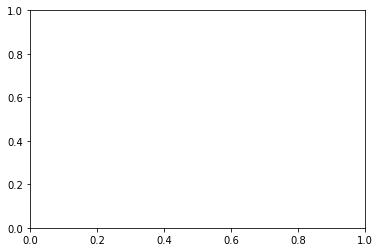

In [45]:
plt.plot(day_new,scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

In [ ]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [ ]:
df3=scaler.inverse_transform(df3).tolist()

In [ ]:
plt.plot(df3)